In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adaline(x, y, lr=0.01, iters=20, init_w=None):
    w = init_w
    if w is None:
        w = np.random.random((x.shape[1]+1,))*0.01
    x = np.hstack((np.ones((x.shape[0], 1)), x))

    for i in range(iters):
        predic = x.dot(w)
        w += lr * ((y - predic)[...,None]*x).mean(0)
        mse = ((predic - y)**2).mean()
    
    return [w, mse]

In [6]:
data = np.loadtxt("rabbit_data.txt")
x = data[:,0][..., None]
y = data[:,1]

In [16]:
weights, mse = adaline(x, y, iters=100, lr=0.0000001)
print("\tFinal MSE:", mse)
print("\tFinal Weights:", weights)

	Final MSE: 6403.9085322575265
	Final Weights: [0.00942202 0.29841187]


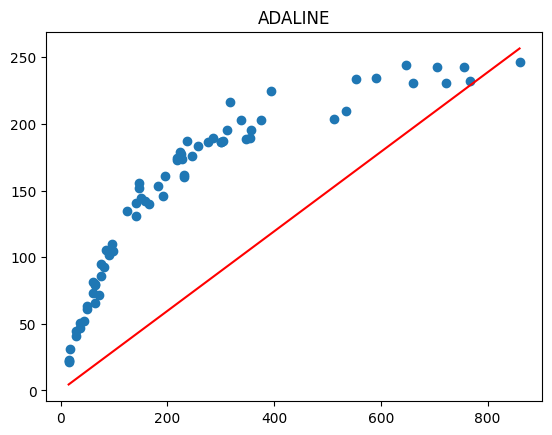

In [14]:
x_range = np.linspace(x.min(), x.max(), 100)
plt.figure()
plt.scatter(x[:,0], y)
plt.plot(x_range, weights[0] + weights[1] * x_range, c="r")
plt.title("ADALINE")
plt.show()

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [19]:
def fit_mlp_and_plot(train_x, train_y, test_x, test_y, **kwargs):
    mlp = MLPRegressor(**kwargs)
    mlp.fit(train_x, train_y)
    print("\tNumber of iterations:", mlp.n_iter_)
    print("\tMSE on train:", ((mlp.predict(train_x) - train_y)**2).mean())
    print("\tMSE on test:", ((mlp.predict(test_x) - test_y)**2).mean())

    x_range = np.linspace(train_x.min(), train_x.max(), 100)
    mlp_predict = mlp.predict(x_range[:, None])
    plt.figure()
    plt.scatter(train_x[:,0], train_y, c="b", label="Training data")
    plt.scatter(test_x[:,0], test_y, c="g", label="Test data")
    plt.plot(x_range, mlp_predict, c="r", label="MLP prediction")

In [21]:
train_x, test_x, train_y, test_y = train_test_split(x, y)

Without Normalization
	Number of iterations: 111
	MSE on train: 67.16634692044221
	MSE on test: 106.31746869278678


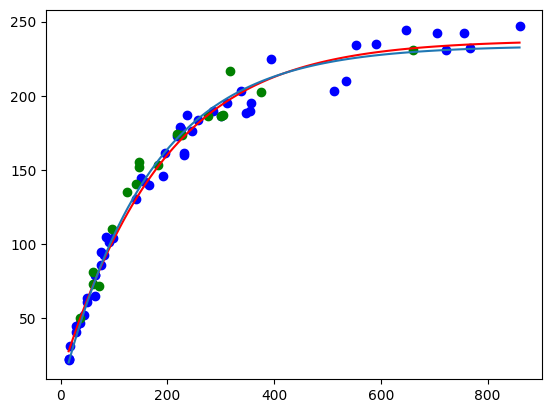

In [66]:
print("Without Normalization")
fit_mlp_and_plot(train_x, train_y, test_x, test_y,
                 activation="tanh", hidden_layer_sizes=(2,), solver="lbfgs",
                 nesterovs_momentum=False
                 )
x_range = np.linspace(min(train_x), max(train_x), 100)
plt.plot(x_range, 233.836 * (1 - np.exp(-0.00604 * x_range)))
plt.show()

Overfit
	Number of iterations: 12961
	MSE on train: 33.03918093119176
	MSE on test: 103.22606133481274


d:\Program Files\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


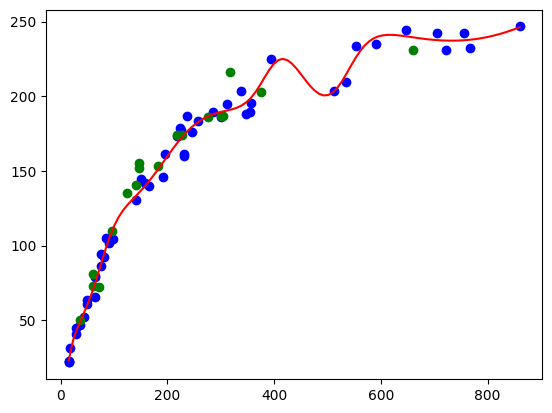

In [52]:
print("Overfit")
fit_mlp_and_plot(train_x, train_y, test_x, test_y,
                 activation="tanh", hidden_layer_sizes=(50,), 
                 max_iter=1000000,
                 solver="lbfgs",
                 alpha=0.0,
                 nesterovs_momentum=False
                 )

Underfit
	Number of iterations: 5
	MSE on train: 2039.2671915963592
	MSE on test: 1277.333347869428


d:\Program Files\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


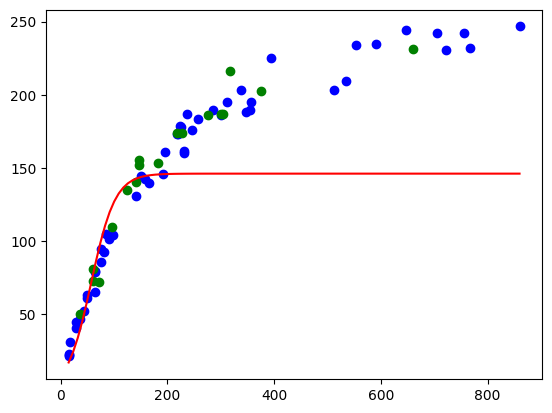

In [53]:
print("Underfit")
fit_mlp_and_plot(train_x, train_y, test_x, test_y,
                 activation="tanh", 
                 hidden_layer_sizes=(1,), 
                 max_iter=5,
                 solver="lbfgs",
                 alpha=0.0,
                 nesterovs_momentum=False
                 )

with Normalization
	Number of iterations: 35
	MSE on train: 0.011580045904433945
	MSE on test: 0.017122998268972577


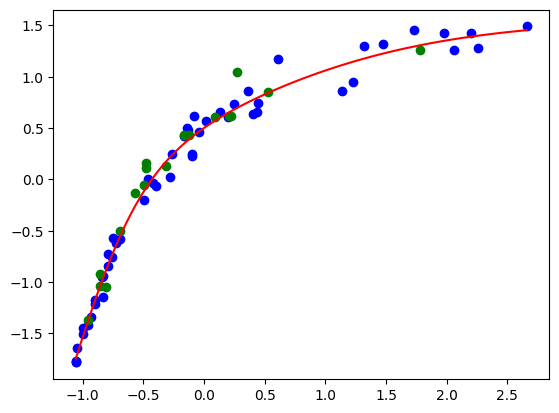

In [68]:
print("with Normalization")
mean_train_x = train_x.mean(axis=0)
std_train_x = train_x.std(axis=0)

train_x_normalized = (train_x - mean_train_x) / std_train_x
test_x_normalized = (test_x - mean_train_x) / std_train_x

mean_train_y = train_y.mean(axis=0)
std_train_y = train_y.std(axis=0)

train_y_normalized = (train_y - mean_train_y) / std_train_y
test_y_normalized = (test_y - mean_train_y) / std_train_y

fit_mlp_and_plot(train_x_normalized, train_y_normalized, test_x_normalized, test_y_normalized,
                 activation="tanh", 
                 hidden_layer_sizes=(2,), 
                 solver="lbfgs",
                 nesterovs_momentum=False
                 )